# 📊 API Test Results Analysis

This notebook analyzes test results from an API testing framework using Pandas and Seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the test results CSV file
df = pd.read_csv('../data/test_results.csv')
df.head()


,test_name,status,duration,error_message,timestamp
0,test_api_3,Pass,1.45,NaN,4/3/2025 6:42
1,test_api_3,Pass,3.88,NaN,4/5/2025 12:23
2,test_api_18,Pass,2.91,NaN,4/3/2025 2:27
3,test_api_7,Fail,4.68,ConnectionRefused,4/2/2025 3:25
4,test_api_13,Pass,2.05,NaN,4/6/2025 6:55


## 1️⃣ Summary Statistics

In [2]:
# Summary of test results
print("Total tests:", len(df))
print(df['status'].value_counts())
df.describe()


Total tests: 100
status
Pass    83
Fail    17
Name: count, dtype: int64


,duration
count,100.000000
mean,2.898800
std,1.216325
min,0.610000
25%,1.962500
50%,2.925000
75%,3.925000
max,4.990000


## 2️⃣ Pass vs Fail Distribution

C:\Users\rrefaat\AppData\Local\Temp\ipykernel_20532\3438675155.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', palette='coolwarm')


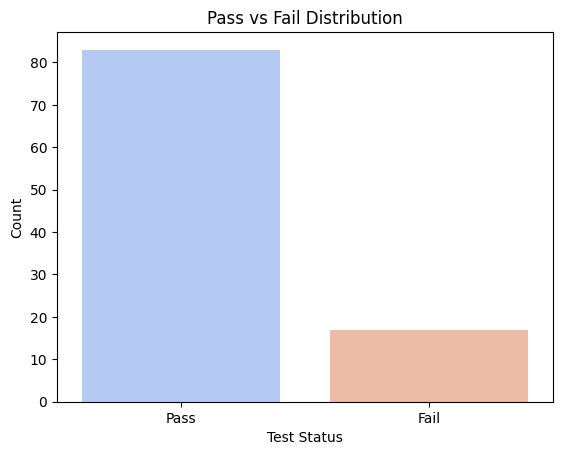

In [3]:
sns.countplot(data=df, x='status', palette='coolwarm')
plt.title("Pass vs Fail Distribution")
plt.xlabel("Test Status")
plt.ylabel("Count")
plt.show()


## 3️⃣ Longest Running Tests

In [4]:
df.sort_values(by='duration', ascending=False).head(10)


,test_name,status,duration,error_message,timestamp
69,test_api_3,Fail,4.99,ConnectionRefused,4/1/2025 21:12
25,test_api_7,Pass,4.81,NaN,4/5/2025 21:09
60,test_api_2,Pass,4.78,NaN,4/6/2025 8:35
39,test_api_2,Pass,4.75,NaN,4/1/2025 5:31
66,test_api_7,Pass,4.73,NaN,4/1/2025 22:35
3,test_api_7,Fail,4.68,ConnectionRefused,4/2/2025 3:25
56,test_api_14,Pass,4.66,NaN,4/5/2025 16:38
70,test_api_18,Pass,4.64,NaN,4/6/2025 15:44
73,test_api_5,Pass,4.60,NaN,4/6/2025 3:03
68,test_api_6,Pass,4.50,NaN,4/6/2025 10:36


## 4️⃣ Most Frequent Failing Tests

In [5]:
df_failures = df[df['status'] == 'Fail']
df_failures['test_name'].value_counts().head(10)


test_name
test_api_17    4
test_api_3     3
test_api_14    3
test_api_10    2
test_api_2     2
test_api_7     1
test_api_4     1
test_api_8     1
Name: count, dtype: int64

## ✅ Insights and Next Steps
- Identify flaky tests
- Automate rerun for long-duration tests
- Monitor frequent failure causes